# Exploratory Data Analysis for Basal Cell Carcinoma Dataset

## Imports
---

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Load Dataset
---

In [149]:
filepath = r'C:\Users\dimka\Documents\Dermoscopy_Dataset\datasets\BCC FINAL Learning Set.csv'
imagepath = r'C:\Users\dimka\Documents\Dermoscopy_Dataset\datasets\All BCC'

initial_data = pd.read_csv(filepath)
initial_data.head()

,A/A,"Histological diagnosis1:superficial, 2:low risk, 3:high risk",AGE,"SEX 0:male, 1:female",Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities,Folicular citeria 1-YES 0-No,Milia + Comedo 1-YES 0-No,MAY globues 1-YES 0-NO,Shinywhite_struct. 1-Yes. 0-No,"Arborizingtelangiectasia 1:Yes, 0:No","Shortfinesuperficialtelangiectasia 1:Yes, 0:No","Multiplesmallerosions 1:Yes, 0:No","Ulceration 1:Yes, 0:No",Blue globlules/nests,Brown color structures,"Histological diagnosis1:superficial, 2:low risk, 3:high risk.1",Histological type
0,1,2,79.0,M,1.0,0,1,0,1,0,1,1,1,0.0,0,2.0,NaN
1,2,2,41.0,M,2.0,0,1,0,0,0,1,0,0,1.0,1,2.0,NaN
2,3,2,74.0,M,2.0,0,0,0,1,1,0,0,0,1.0,0,2.0,NaN
3,4,1,77.0,M,2.0,0,0,0,0,0,1,0,0,1.0,0,1.0,NaN
4,5,2,37.0,M,1.0,1,0,0,0,0,1,0,1,1.0,1,2.0,NaN


## Dataframe Reordering
---

### Check Columns

In [150]:
initial_data.columns

Index(['    A/A',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk', 'AGE',
       'SEX                0:male, 1:female',
       'Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities',
       'Folicular citeria 1-YES 0-No', 'Milia + Comedo 1-YES 0-No',
       'MAY globues 1-YES 0-NO', 'Shinywhite_struct. 1-Yes. 0-No',
       'Arborizingtelangiectasia 1:Yes, 0:No',
       'Shortfinesuperficialtelangiectasia 1:Yes, 0:No',
       'Multiplesmallerosions 1:Yes, 0:No', 'Ulceration   1:Yes, 0:No',
       'Blue globlules/nests', 'Brown color structures ',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk.1',
       'Histological type'],
      dtype='object')

## Check Datatypes and null values

In [151]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 17 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0       A/A                                                               842 non-null    int64  
 1   Histological diagnosis1:superficial, 2:low risk, 3:high risk          842 non-null    int64  
 2   AGE                                                                   837 non-null    float64
 3   SEX                0:male, 1:female                                   838 non-null    object 
 4   Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities  837 non-null    float64
 5   Folicular citeria 1-YES 0-No                                          842 non-null    int64  
 6   Milia + Comedo 1-YES 0-No                                             842 non-null    int64  
 7  

Features 2, 3, 4, 13, 15 and 16 have null values.

In [152]:
initial_data.describe()

,A/A,"Histological diagnosis1:superficial, 2:low risk, 3:high risk",AGE,Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities,Folicular citeria 1-YES 0-No,Milia + Comedo 1-YES 0-No,MAY globues 1-YES 0-NO,Shinywhite_struct. 1-Yes. 0-No,"Arborizingtelangiectasia 1:Yes, 0:No","Shortfinesuperficialtelangiectasia 1:Yes, 0:No","Multiplesmallerosions 1:Yes, 0:No","Ulceration 1:Yes, 0:No",Blue globlules/nests,Brown color structures,"Histological diagnosis1:superficial, 2:low risk, 3:high risk.1"
count,842.000000,842.000000,837.000000,837.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,841.000000,842.000000,841.000000
mean,421.500000,1.907363,71.309438,1.451613,0.141330,0.108076,0.033254,0.441805,0.517815,0.387173,0.186461,0.407363,0.318668,0.351544,1.907253
std,243.208758,0.592034,48.480782,0.678877,0.348569,0.310661,0.179406,0.496897,0.617071,0.487393,0.392749,0.491636,0.466237,0.477736,0.592378
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,211.250000,2.000000,61.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,421.500000,2.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,631.750000,2.000000,80.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,842.000000,3.000000,1019.000000,4.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000


**AGE:** needs checking, max value beyond expect bounds (1019)

<img src="../Graphics/EDA/AGE out of bounds.png"/>


<img src="../Graphics/EDA/AGE out of bounds zero.png"/>


2x1019 values definately out of bounds, 2x119 seem improbable, also 0 value on sample 744 wrong as well, as it can be seen on the dermoscopy image.

<img height="240" src="../Graphics/EDA/sample 744.png" width="240"/>

**Arborizingtelangiectasia:** needs checking, max value beyond expected bounds (11)


<img src="../Graphics/EDA/Arbor out of bounds.png"/>

One value out of bounds (11), probably 1 was intended

## Correct the meaningless values

In [153]:
df = initial_data.copy(deep=True) # create a copy of the original data

In [154]:
df.columns

Index(['    A/A',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk', 'AGE',
       'SEX                0:male, 1:female',
       'Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities',
       'Folicular citeria 1-YES 0-No', 'Milia + Comedo 1-YES 0-No',
       'MAY globues 1-YES 0-NO', 'Shinywhite_struct. 1-Yes. 0-No',
       'Arborizingtelangiectasia 1:Yes, 0:No',
       'Shortfinesuperficialtelangiectasia 1:Yes, 0:No',
       'Multiplesmallerosions 1:Yes, 0:No', 'Ulceration   1:Yes, 0:No',
       'Blue globlules/nests', 'Brown color structures ',
       'Histological diagnosis1:superficial, 2:low risk, 3:high risk.1',
       'Histological type'],
      dtype='object')

In [155]:
df.drop(columns=['Histological diagnosis1:superficial, 2:low risk, 3:high risk.1', '    A/A'], inplace=True)
df.columns

Index(['Histological diagnosis1:superficial, 2:low risk, 3:high risk', 'AGE',
       'SEX                0:male, 1:female',
       'Location 1=head/neck 2=trunk 3=upper extremities 4=lower extremities',
       'Folicular citeria 1-YES 0-No', 'Milia + Comedo 1-YES 0-No',
       'MAY globues 1-YES 0-NO', 'Shinywhite_struct. 1-Yes. 0-No',
       'Arborizingtelangiectasia 1:Yes, 0:No',
       'Shortfinesuperficialtelangiectasia 1:Yes, 0:No',
       'Multiplesmallerosions 1:Yes, 0:No', 'Ulceration   1:Yes, 0:No',
       'Blue globlules/nests', 'Brown color structures ', 'Histological type'],
      dtype='object')

### Simplify the column names

In [156]:
simplified_names = ['Diagnosis', 'Age', 'Sex', 'Location'] + [f'Feature {x}' for x in range(len(df.columns) - 5)] +  ['Histological Type']
name_dict = dict(zip(simplified_names, initial_data.columns))   #store the corresponding initial values along with the new ones in a dictionary

In [157]:
df.columns = simplified_names

### Check the distribution of Ages

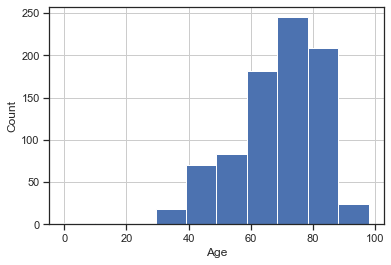

In [158]:
df[df['Age'] < 100]['Age'].hist(bins=10)    #plot the Age distribution only for ages below 100
plt.xlabel('Age');
plt.ylabel('Count');

In [159]:
mid_age = df[df['Age'] < 100]['Age'].median()   #Distribution is skewed so prefer to impute using the median
df.loc[(df['Age'] > 100) | (df['Age'] == 0) , 'Age'] = mid_age  #Impute with the median any values over 100 or equal to 0
df['Age'].fillna(value=mid_age, inplace=True)   #fill NaN values with the median

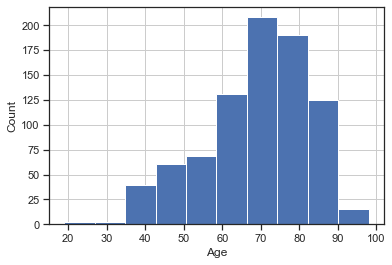

In [160]:
df['Age'].hist(bins=10) #plot the Age distribution again with all values
plt.xlabel('Age');
plt.ylabel('Count');

### Check the Sex Feature Values and Distribution

In [161]:
df['Sex'].unique()    #check the unique values appearing in the Sex column

array(['M', 'F', nan, 'F ', '1', '0'], dtype=object)

In [162]:
def correct_sex_value(x):
    if isinstance(x, str):
        y=x.lower().strip()
        if y=='m' or y=='0':
            return 0
        elif y=='f' or y=='1':
            return 1
    else:
        return x

df['Sex'] = df['Sex'].apply(correct_sex_value)  #replace M, F with 0 and 1

In [163]:
list(df['Sex'].unique())

[0.0, 1.0, nan]

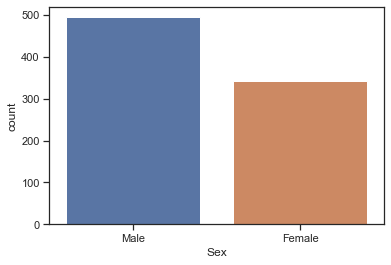

In [164]:
sns.countplot(x=df['Sex']) #plot the Sex distribution
plt.xticks([0, 1], ['Male', 'Female']);

In [165]:
df.Sex.mode()

0    0.0
Name: Sex, dtype: float64

In [166]:
df['Sex'].fillna(0, inplace=True)   #fill the missing values with the mode of Sex
list(df['Sex'].unique())

[0.0, 1.0]

### Plot the distribution of diagnosis based on sex and age of the patients

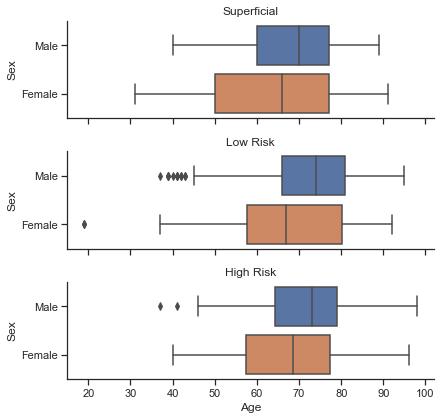

In [167]:
sns.set_theme(style="ticks")
g = sns.catplot(x='Age', y='Sex', row='Diagnosis', kind='box', orient='h', height=2, aspect=3, data=df)
plt.yticks([0, 1], ['Male', 'Female'])
hist_diagnosis_columns = ['Superficial', 'Low Risk', 'High Risk']
diagnosis = 0
for ax in g.axes.flatten():
    ax.set_title(hist_diagnosis_columns[diagnosis])
    diagnosis +=1

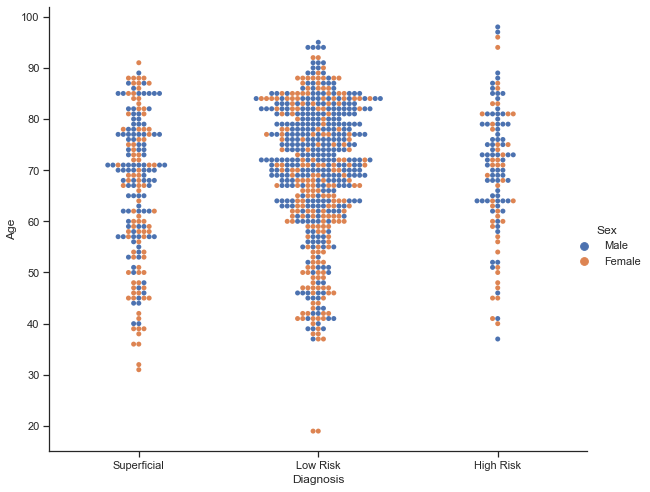

In [168]:
g = sns.catplot(x='Diagnosis', y='Age', hue='Sex', kind='swarm', height=7, aspect=1.2, data=df)
plt.xticks([0, 1, 2], hist_diagnosis_columns)
for t, l in zip(g._legend.texts, ['Male', 'Female']):
    t.set_text(l)

In [170]:
hist_diagnosis = pd.get_dummies(df.iloc[:, 0])
hist_diagnosis.columns = hist_diagnosis_columns

In [171]:
df.Location.mode()

0    1.0
Name: Location, dtype: float64

In [8]:
location_columns = ['NaN', 'Head/Neck', 'Trunk', 'Upper Extremities', 'Lower Extremities']
location = pd.get_dummies(initial_data.iloc[:, 4])
# location.columns = location_columns